In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [171]:
data = pd.read_csv('ODI-2019-processed.csv')

In [177]:
data

,Timestamp,Have you taken a course on machine learning?,Have you taken a course on information retrieval?,Have you taken a course on statistics?,Have you taken a course on databases?,What is your gender?,Chocolate makes you.....,What makes a good day for you (1)?,What makes a good day for you (2)?,What programme are you in?,Birth Day,Birth Month,Birth Year,Neighbors,Competition,Random,Stress,Time you went to be Yesterday
0,3/27/2019 10:16:11,1.0,1,1.0,1.0,unknown,slim,sun,lecture,artificial intelligence,NaN,NaN,NaN,3.0,1.000000e+02,6.000000e+00,NaN,23.0
1,4/1/2019 15:58:21,0.0,0,1.0,1.0,male,fat,dm,ai,artificial intelligence,9.0,7.0,1992.0,1.0,0.000000e+00,7.000000e+00,1.000000e+00,3.0
2,4/1/2019 15:59:07,1.0,1,NaN,1.0,male,neither,0,0,computer science,4.0,8.0,1995.0,0.0,0.000000e+00,0.000000e+00,1.000000e+02,0.0
3,4/1/2019 15:59:30,1.0,1,1.0,1.0,male,fat,winning,food,econometrics and operations research,29.0,9.0,1993.0,2.0,4.200000e+01,1.645000e+00,0.000000e+00,0.0
4,4/1/2019 15:59:58,0.0,1,1.0,1.0,male,neither,kiss,love,computer science,2.0,12.0,1993.0,2.0,NaN,6.600000e+01,1.000000e+02,20.0
5,4/1/2019 16:00:01,1.0,1,1.0,1.0,male,unknown,ganja,sun,artificial intelligence,31.0,12.0,1994.0,0.0,NaN,4.200000e+02,1.000000e+02,0.0
6,4/1/2019 16:00:12,1.0,0,1.0,0.0,female,neither,chocolate,sun,bioinformatics and systems biology,9.0,10.0,1995.0,NaN,1.000000e+02,7.390000e+02,8.000000e+01,22.0
7,4/1/2019 16:00:16,1.0,1,1.0,1.0,male,i have no idea what you are talking about,stay with my friends,sun,bioinformatics and systems biology,22.0,7.0,1996.0,0.0,NaN,5.000000e+00,5.000000e+01,24.0
8,4/1/2019 16:00:21,0.0,0,1.0,1.0,male,neither,done something useful,had fun,computational science,30.0,2.0,1945.0,0.0,0.000000e+00,3.100000e+01,0.000000e+00,3.0
9,4/1/2019 16:00:31,1.0,1,1.0,0.0,male,neither,a sunny day,relax walks,artificial intelligence,30.0,2.0,1945.0,NaN,NaN,5.000000e+00,8.000000e+01,2.0


In [173]:
mapping = {np.nan:['unknown'], 1:['yes','mu','ja','male'], 0:['no','sigma','nee','female']}
for key in mapping:
    data[data.columns[[1,2,3,4]]] = data[data.columns[[1,2,3,4]]].replace(to_replace = mapping[key], value = key)

In [185]:
data[data.columns[2]] = pd.to_numeric(data[data.columns[2]])

# 2. Correlation

In [186]:
correlation_data = data.copy().drop(data.columns[[0,7,8]],axis = 1)

In [187]:
correlation_data

,Have you taken a course on machine learning?,Have you taken a course on information retrieval?,Have you taken a course on statistics?,Have you taken a course on databases?,What is your gender?,Chocolate makes you.....,What programme are you in?,Birth Day,Birth Month,Birth Year,Neighbors,Competition,Random,Stress,Time you went to be Yesterday
0,1.0,1.0,1.0,1.0,unknown,slim,artificial intelligence,NaN,NaN,NaN,3.0,1.000000e+02,6.000000e+00,NaN,23.0
1,0.0,0.0,1.0,1.0,male,fat,artificial intelligence,9.0,7.0,1992.0,1.0,0.000000e+00,7.000000e+00,1.000000e+00,3.0
2,1.0,1.0,NaN,1.0,male,neither,computer science,4.0,8.0,1995.0,0.0,0.000000e+00,0.000000e+00,1.000000e+02,0.0
3,1.0,1.0,1.0,1.0,male,fat,econometrics and operations research,29.0,9.0,1993.0,2.0,4.200000e+01,1.645000e+00,0.000000e+00,0.0
4,0.0,1.0,1.0,1.0,male,neither,computer science,2.0,12.0,1993.0,2.0,NaN,6.600000e+01,1.000000e+02,20.0
5,1.0,1.0,1.0,1.0,male,unknown,artificial intelligence,31.0,12.0,1994.0,0.0,NaN,4.200000e+02,1.000000e+02,0.0
6,1.0,0.0,1.0,0.0,female,neither,bioinformatics and systems biology,9.0,10.0,1995.0,NaN,1.000000e+02,7.390000e+02,8.000000e+01,22.0
7,1.0,1.0,1.0,1.0,male,i have no idea what you are talking about,bioinformatics and systems biology,22.0,7.0,1996.0,0.0,NaN,5.000000e+00,5.000000e+01,24.0
8,0.0,0.0,1.0,1.0,male,neither,computational science,30.0,2.0,1945.0,0.0,0.000000e+00,3.100000e+01,0.000000e+00,3.0
9,1.0,1.0,1.0,0.0,male,neither,artificial intelligence,30.0,2.0,1945.0,NaN,NaN,5.000000e+00,8.000000e+01,2.0


In [188]:
for column in correlation_data[correlation_data.columns[[5,6]]]:
    correlation_data[column] = pd.Categorical(correlation_data[column]).rename_categories([x for x in range(correlation_data[column].nunique())])

In [189]:
correlation_data

,Have you taken a course on machine learning?,Have you taken a course on information retrieval?,Have you taken a course on statistics?,Have you taken a course on databases?,What is your gender?,Chocolate makes you.....,What programme are you in?,Birth Day,Birth Month,Birth Year,Neighbors,Competition,Random,Stress,Time you went to be Yesterday
0,1.0,1.0,1.0,1.0,unknown,3,0,NaN,NaN,NaN,3.0,1.000000e+02,6.000000e+00,NaN,23.0
1,0.0,0.0,1.0,1.0,male,0,0,9.0,7.0,1992.0,1.0,0.000000e+00,7.000000e+00,1.000000e+00,3.0
2,1.0,1.0,NaN,1.0,male,2,4,4.0,8.0,1995.0,0.0,0.000000e+00,0.000000e+00,1.000000e+02,0.0
3,1.0,1.0,1.0,1.0,male,0,5,29.0,9.0,1993.0,2.0,4.200000e+01,1.645000e+00,0.000000e+00,0.0
4,0.0,1.0,1.0,1.0,male,2,4,2.0,12.0,1993.0,2.0,NaN,6.600000e+01,1.000000e+02,20.0
5,1.0,1.0,1.0,1.0,male,4,0,31.0,12.0,1994.0,0.0,NaN,4.200000e+02,1.000000e+02,0.0
6,1.0,0.0,1.0,0.0,female,2,1,9.0,10.0,1995.0,NaN,1.000000e+02,7.390000e+02,8.000000e+01,22.0
7,1.0,1.0,1.0,1.0,male,1,1,22.0,7.0,1996.0,0.0,NaN,5.000000e+00,5.000000e+01,24.0
8,0.0,0.0,1.0,1.0,male,2,3,30.0,2.0,1945.0,0.0,0.000000e+00,3.100000e+01,0.000000e+00,3.0
9,1.0,1.0,1.0,0.0,male,2,0,30.0,2.0,1945.0,NaN,NaN,5.000000e+00,8.000000e+01,2.0


In [190]:
corr = correlation_data.corr()

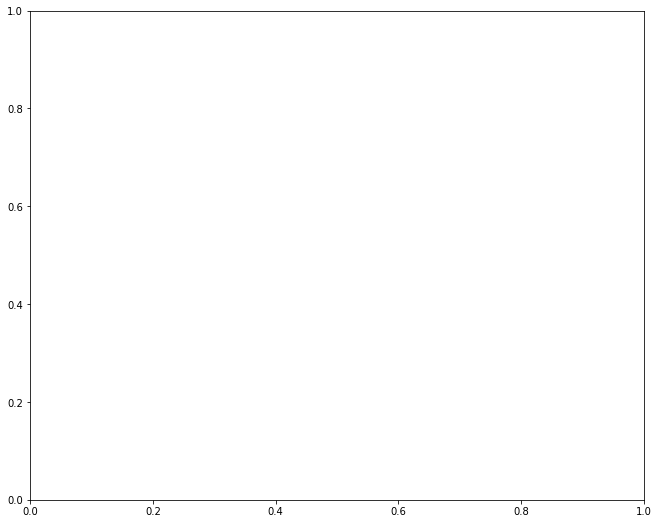

In [191]:
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

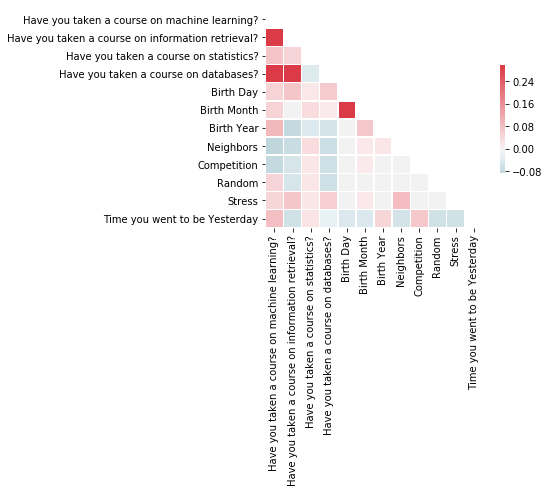

In [192]:
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# 1.2

In [78]:
print(*data.columns, sep='\n')

Timestamp
Have you taken a course on machine learning?
Have you taken a course on information retrieval?
Have you taken a course on statistics?
Have you taken a course on databases?
What is your gender?
Chocolate makes you.....
What makes a good day for you (1)?
What makes a good day for you (2)?
What programme are you in?
Birth Day
Birth Month
Birth Year
Neighbors
Competition
Random
Stress
Time you went to be Yesterday


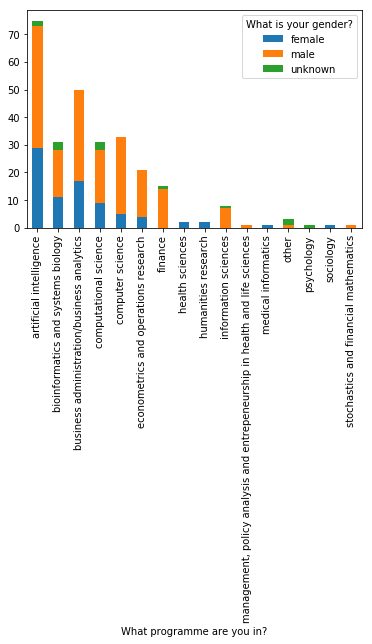

In [130]:
data.groupby([data.columns[9],data.columns[5]]).size().unstack().plot(kind='bar',stacked=True)

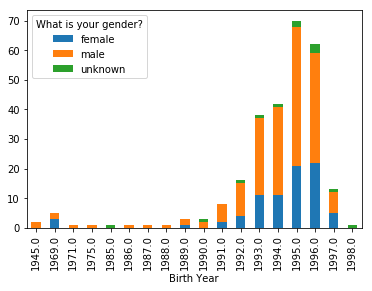

In [108]:
data[(data[data.columns[12]] >= 1900) & (data[data.columns[12]] <= 2000)].groupby([data.columns[12],data.columns[5]]).size().unstack().plot(kind='bar',stacked=True)

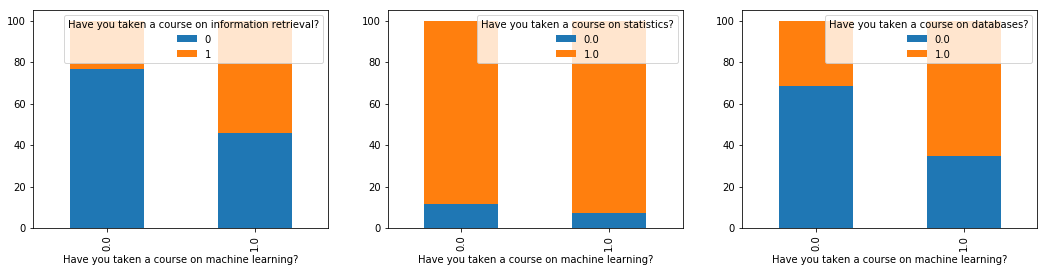

In [165]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18,4))

data.groupby([data.columns[1],data.columns[2]]).size().groupby(level=0).apply(lambda x: 100 * x / x.sum()).unstack().plot(kind='bar',stacked=True, ax = ax1)
data.groupby([data.columns[1],data.columns[3]]).size().groupby(level=0).apply(lambda x: 100 * x / x.sum()).unstack().plot(kind='bar',stacked=True, ax = ax2)
data.groupby([data.columns[1],data.columns[4]]).size().groupby(level=0).apply(lambda x: 100 * x / x.sum()).unstack().plot(kind='bar',stacked=True, ax = ax3)

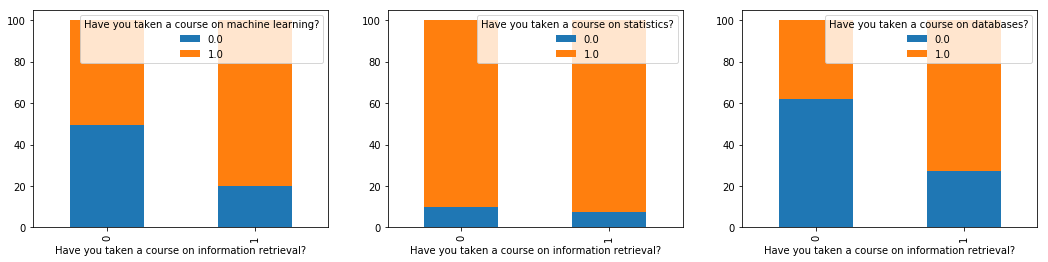

In [166]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18,4))

data.groupby([data.columns[2],data.columns[1]]).size().groupby(level=0).apply(lambda x: 100 * x / x.sum()).unstack().plot(kind='bar',stacked=True, ax = ax1)
data.groupby([data.columns[2],data.columns[3]]).size().groupby(level=0).apply(lambda x: 100 * x / x.sum()).unstack().plot(kind='bar',stacked=True, ax = ax2)
data.groupby([data.columns[2],data.columns[4]]).size().groupby(level=0).apply(lambda x: 100 * x / x.sum()).unstack().plot(kind='bar',stacked=True, ax = ax3)

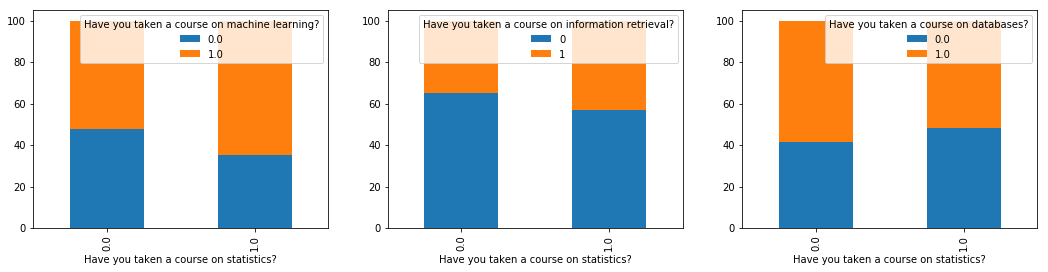

In [167]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18,4))

data.groupby([data.columns[3],data.columns[1]]).size().groupby(level=0).apply(lambda x: 100 * x / x.sum()).unstack().plot(kind='bar',stacked=True, ax = ax1)
data.groupby([data.columns[3],data.columns[2]]).size().groupby(level=0).apply(lambda x: 100 * x / x.sum()).unstack().plot(kind='bar',stacked=True, ax = ax2)
data.groupby([data.columns[3],data.columns[4]]).size().groupby(level=0).apply(lambda x: 100 * x / x.sum()).unstack().plot(kind='bar',stacked=True, ax = ax3)

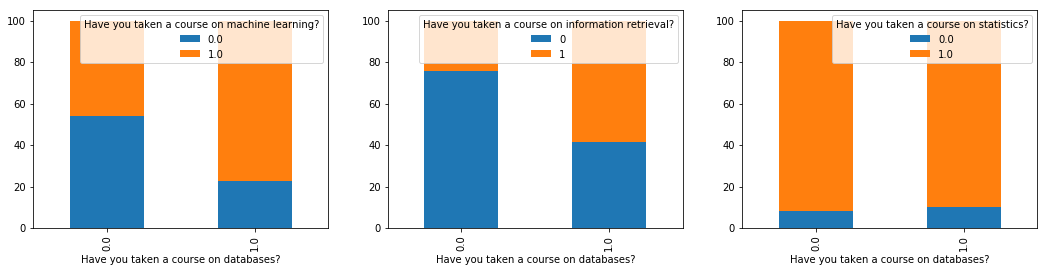

In [169]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18,4))

data.groupby([data.columns[4],data.columns[1]]).size().groupby(level=0).apply(lambda x: 100 * x / x.sum()).unstack().plot(kind='bar',stacked=True, ax = ax1)
data.groupby([data.columns[4],data.columns[2]]).size().groupby(level=0).apply(lambda x: 100 * x / x.sum()).unstack().plot(kind='bar',stacked=True, ax = ax2)
data.groupby([data.columns[4],data.columns[3]]).size().groupby(level=0).apply(lambda x: 100 * x / x.sum()).unstack().plot(kind='bar',stacked=True, ax = ax3)

(0, 100)

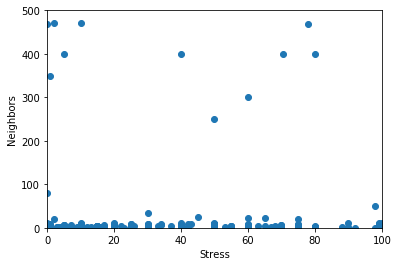

In [229]:
plt.scatter(data[data.columns[16]],data[data.columns[13]])
plt.ylabel(data.columns[13])
plt.ylim(0,500)
plt.xlabel(data.columns[16])
plt.xlim(0,100)